In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


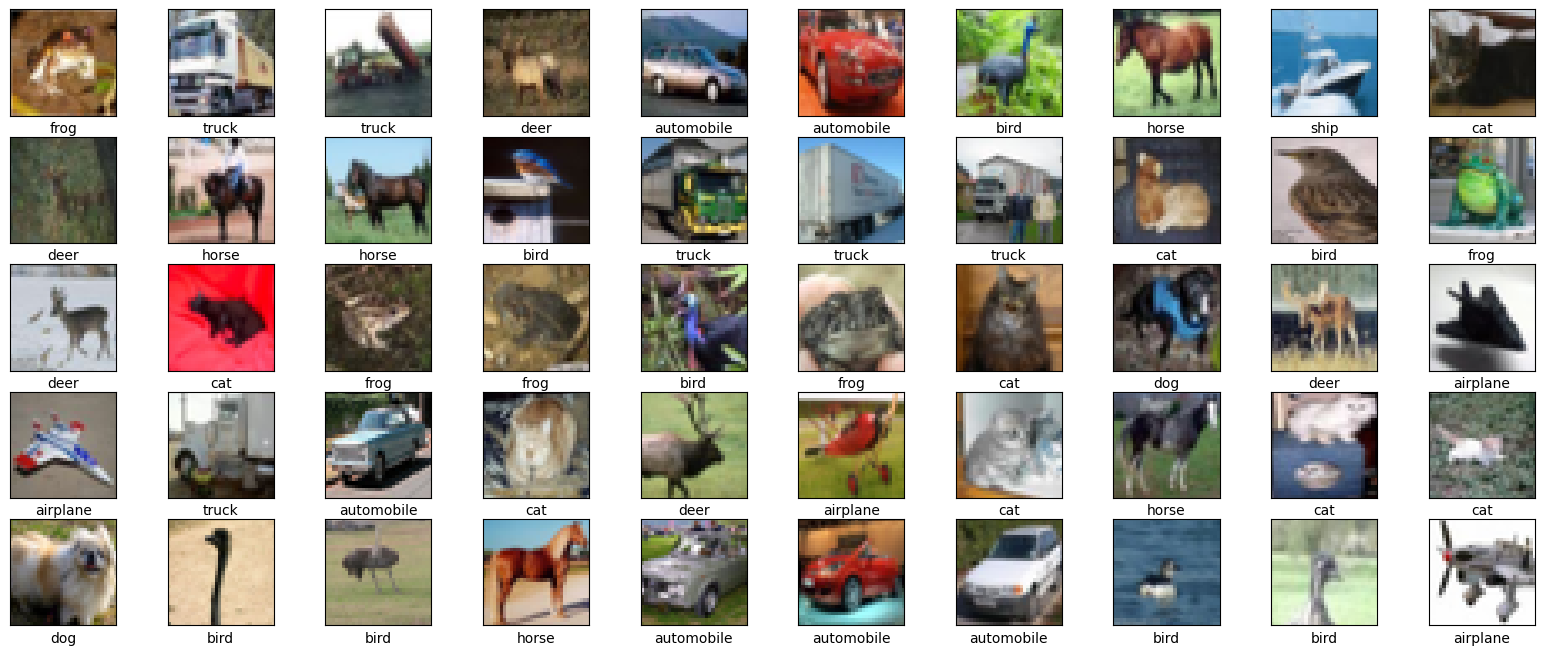

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()



In [3]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [4]:
modelA = model
modelA.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)



In [5]:
h = modelA.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8082 - accuracy: 0.3677 - val_loss: 1.5892 - val_accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4248 - accuracy: 0.4889 - val_loss: 1.3486 - val_accuracy: 0.5095
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2971 - accuracy: 0.5408 - val_loss: 1.3602 - val_accuracy: 0.5172
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2078 - accuracy: 0.5750 - val_loss: 1.2405 - val_accuracy: 0.5652
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1439 - accuracy: 0.5987 - val_loss: 1.1937 - val_accuracy: 0.5869
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0886 - accuracy: 0.6192 - val_loss: 1.1943 - val_accuracy: 0.5903
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0386 - accuracy: 0.6378 - val_loss: 1.1400 - val_accuracy:

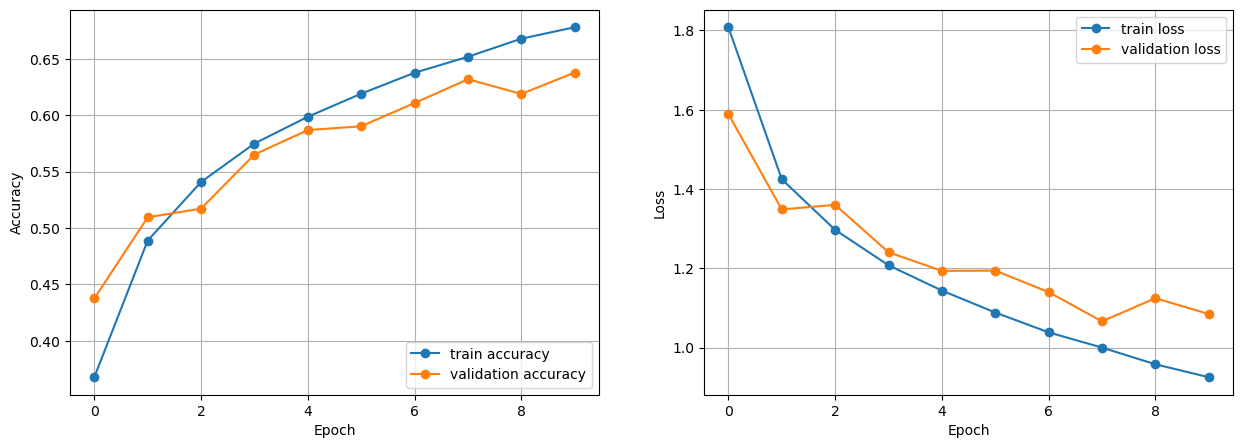

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



313/313 [==============================] - 1s 4ms/step - loss: 1.0848 - accuracy: 0.6379

Test Accuracy: 0.6379000544548035

Test Loss: 1.0848472118377686
313/313 [==============================] - 1s 2ms/step


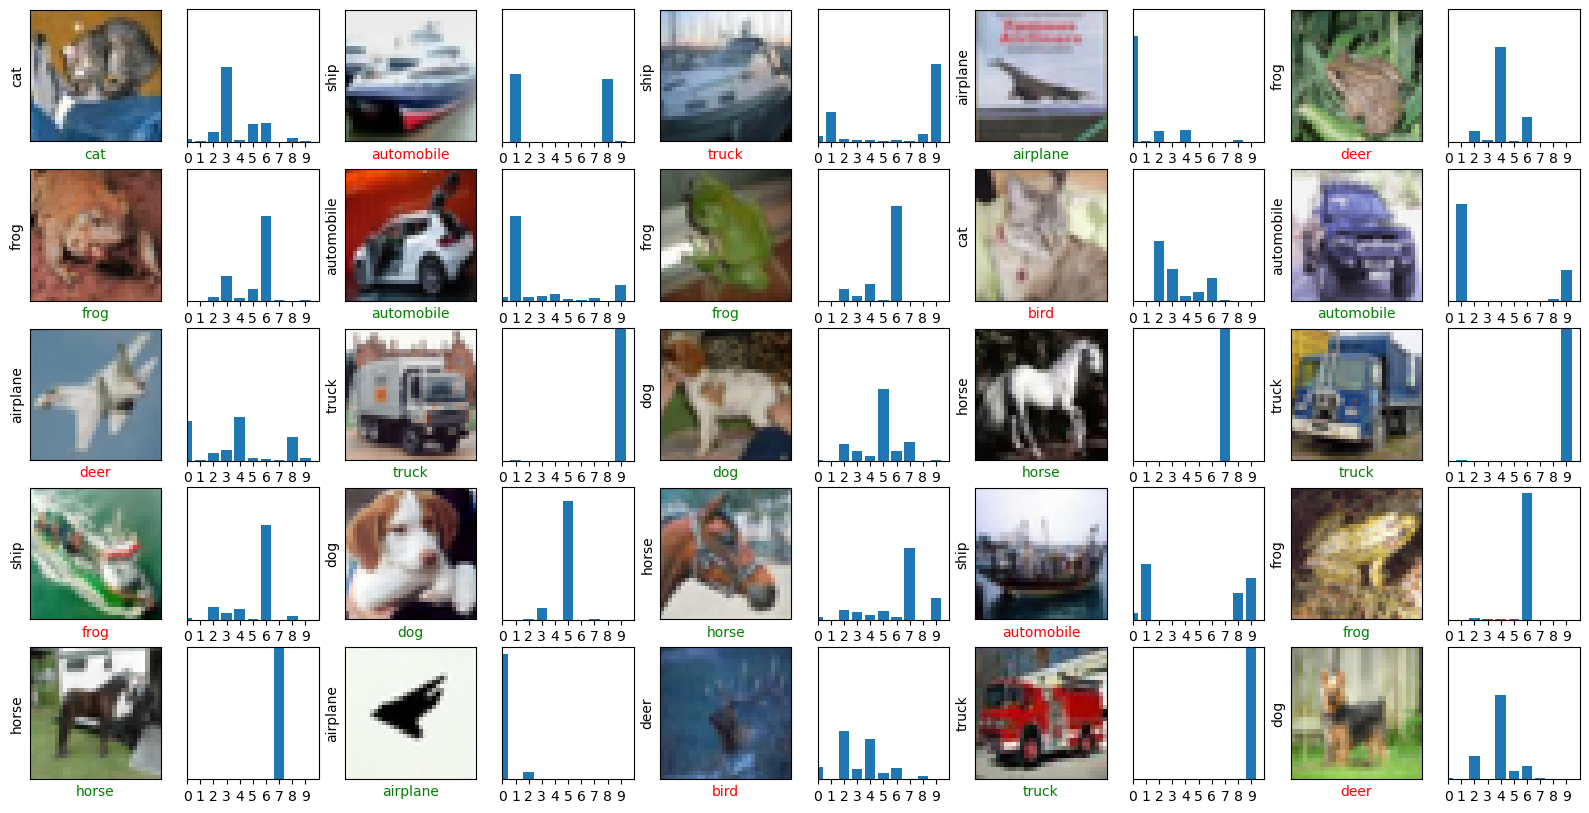

In [7]:
test_loss, test_acc = modelA.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

predictions = modelA.predict(X_test)

rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0670 - accuracy: 0.2697 - val_loss: 1.8235 - val_accuracy: 0.3216
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7946 - accuracy: 0.3342 - val_loss: 1.6971 - val_accuracy: 0.3660
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0844 - accuracy: 0.2062 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy:

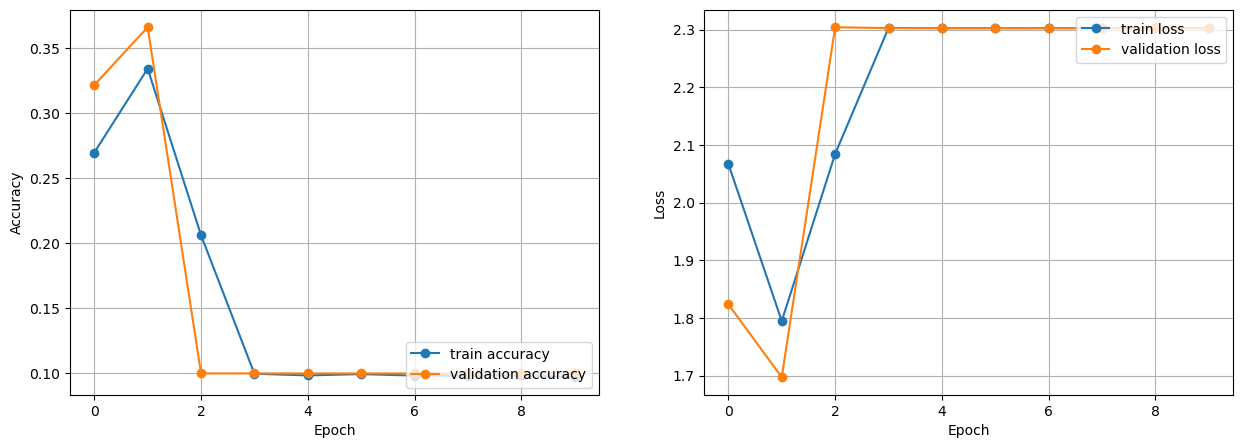

In [10]:
# ModelB with Attention Mechanism
from tensorflow.keras.layers import Attention

# Attention layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create trainable weights for attention
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Compute query, key, and value
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        # Attention scores
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        # Weighted sum using attention scores
        output = tf.matmul(attention_scores, v)

        return output

# ModelB with attention mechanism
modelB = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    AttentionLayer(),  # Add attention layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelB.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train ModelB
h_B = modelB.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Plot accuracy and loss curves for ModelB
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_B.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_B.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_B.history['loss'], 'o-', label='train loss')
plt.plot(h_B.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [11]:
# Evaluate ModelB on test set
test_loss_B, test_acc_B = modelB.evaluate(X_test, Y_test)
print('\nTest Accuracy (ModelB):', test_acc_B)
print('Test Loss (ModelB):', test_loss_B)

# Predictions for ModelB
predictions_B = modelB.predict(X_test)

# Compare best predictions for both models
best_predictions_A = np.argmax(predictions, axis=1)
best_predictions_B = np.argmax(predictions_B, axis=1)

# Print comparison of best predictions
print("\nComparison of Best Predictions:")
print("ModelA - Correct Predictions:", np.sum(best_predictions_A == Y_test[:,0]))
print("ModelB - Correct Predictions:", np.sum(best_predictions_B == Y_test[:,0]))

313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1000

Test Accuracy (ModelB): 0.10000000149011612
Test Loss (ModelB): 2.3027215003967285
313/313 [==============================] - 1s 2ms/step

Comparison of Best Predictions:
ModelA - Correct Predictions: 6379
ModelB - Correct Predictions: 1000


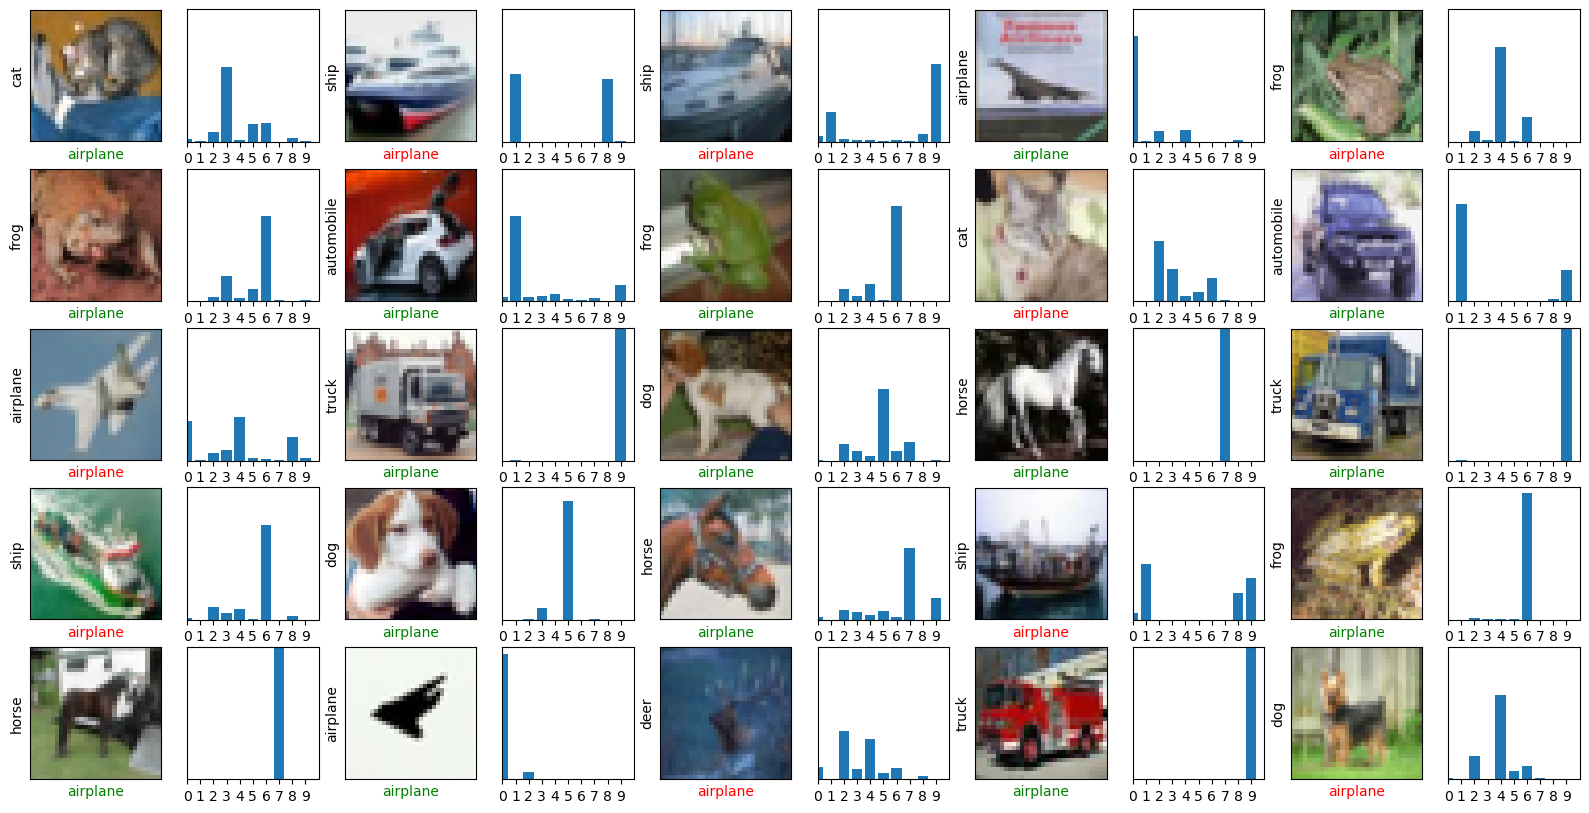

In [12]:
plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(best_predictions_B[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(best_predictions_B[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()